In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
'''Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing'''

fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,16,24]

233

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

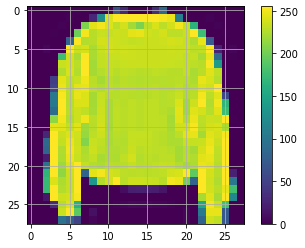

In [7]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()

plt.grid(True)

plt.show()

In [8]:
# Data Preprocessing
'''This simply means applying some prior transformations to our data before feeding it the model.
In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1.'''

train_images = train_images/255
test_images = test_images/255

In [9]:
# Using GPU
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [11]:
# Building model

'''
Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) 
to denote that our input should come in in that shape. 
The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be 
associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron 
from the previous layer connects to each neuron of this layer. 
It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output layer and is also a dense layer. It has 10 neurons that we will look at to determine our 
models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. 
The activation function softmax is used on this layer to calculate a probabillity distribution for each class. 
This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of
the image being that class.'''

model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28, 28)),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
# Compile
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Train model

model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4973 - accuracy: 0.8250
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3763 - accuracy: 0.8638
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8766
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8847
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2960 - accuracy: 0.8903
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.8973: 0s - loss: 0.2791 - accura
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2712 - accuracy: 0.8990
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2568 - accuracy: 0.9046


In [14]:
# Testing accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Testing accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3276 - accuracy: 0.8826
Testing accuracy: 0.8826000094413757


In [15]:
predictions = model.predict(test_images)

print(predictions[0])

[5.0383869e-07 3.2395229e-07 2.3568121e-09 9.7315889e-10 2.5517904e-08
 2.2946205e-03 3.1372250e-07 8.5400753e-03 4.2744718e-06 9.8915988e-01]


In [15]:
# If we want to get the value with the highest score we can use a useful function from numpy called argmax(). 
# This simply returns the index of the maximium value from a numpy array.

np.argmax([predictions[0]])

9

In [16]:
test_labels[0]

9

In [17]:
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Correct class: " + label)
  plt.xlabel("Predicted class: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [18]:
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

In [19]:
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 9999:
        return int(num)
    else:
      print("Try again!")


Pick a number: 9442


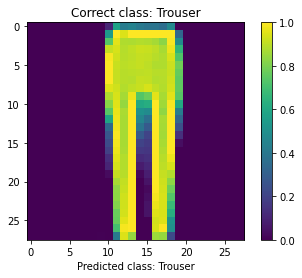

In [31]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)